<a href="https://colab.research.google.com/github/Zafar-Lab/scDREAMER/blob/main/2109_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%tensorflow_version 1.x

In [2]:

import warnings
warnings.filterwarnings('ignore')

"""
!pip install -U scipy==1.5.0
!pip install scanpy==1.8.2
!pip install -U scikit-learn
"""


'\n!pip install -U scipy==1.5.0\n!pip install scanpy==1.8.2\n!pip install -U scikit-learn\n'

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1" # difference between gpu '0' and '1'
#os.environ["PYTHONHASHSEED"] = "0"

import numpy as np
import tensorflow as tf2
import random
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

import scipy.io
from sklearn.decomposition import PCA
import pdb

import pandas as pd
import scanpy as sc


import scipy.sparse
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import stats 
from scipy import * 
import datetime 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

os.getpid()


2023-05-20 17:50:33.008697: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 17:50:33.677567: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term


1513802

In [4]:
#tf.enable_eager_execution()
np.random.seed(0)
#tf.set_random_seed(0)
tf.set_random_seed(0)
random.seed(0)
tf2.random.set_seed(0)
tf2.keras.utils.set_random_seed(0)
#tf.keras.utils.set_random_seed(0)

Building model

In [5]:

"""

Immune_Human_pseudo_cell_types_apr17_0per: 14
Immune_Human_pseudo_cell_types_clus15_50_0per

Immune_Human_louvain_ 14_0.5_0.0

"""

data_path = "/home/ajita/Documents/data_integration/Immune/Immune_Human_leiden_14_0.5_0.0.h5ad"

In [6]:
name = "Immune_Human"

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
# provide the cell type that is inferred using community algorithms
cell_type_key_dic = {'Immune_Human' : 'cell_type_inferred', #'final_annotation',
                 'Lung' : 'cell_type_inferred',
                 'Pancreas' : 'cell_type_inferred',
                 'Human_Mouse' : "cell_type_inferred",
                 "Human_Retina":"cell_type_inferred"
                    }     

# provide the selected (confident) cell types for learning the model
cell_type_key_dic_NA = {'Immune_Human' : 'celltype_NA', #'final_annotation',
                 'Lung' : 'celltype_NA',
                 'Pancreas' : 'celltype_NA',
                 'Human_Mouse' : "celltype_NA",
                 "Human_Retina":"celltype_NA"
                    } 

# provide the ground truth for plotting purpose
plot_cell_type_key_dic = {'Immune_Human' : 'final_annotation', #'final_annotation',
                 'Lung' : 'cell_type',
                 'Pancreas' : 'celltype',
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster"
                    }   






2023-05-20 17:50:36.409085: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5367 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:d8:00.0, compute capability: 7.5


came in load_gene
updated hvg
here [9 0 1 ... 1 9 9]
Shape self.data_train: (33506, 2000)
Shape self.data_test: (33506, 2000)
encoder input shape  Tensor("concat:0", shape=(?, 2010), dtype=float32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.cast` instead.
decoder input shape  Tensor("concat_2:0", shape=(?, 20), dtype=float32)
inferred check Tensor("Max:0", shape=(), dtype=float32)
entering in for loop 1   512  -- > 256
KL gaussian z Tensor("mul_13:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_12:0", shape=(?,), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cluster DRA on DataSet /home/ajita/Documents/data_integration/Immune/Immune_Human_leiden_14_0.5_0.0.h5ad ... 


2023-05-20 17:50:52.343375: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


Epoch : [0] ,  a_loss = 380.2549, d_loss: -0.0329 , db_loss: 2.0398
latent_matrix shape (33506, 10)
(33506,)


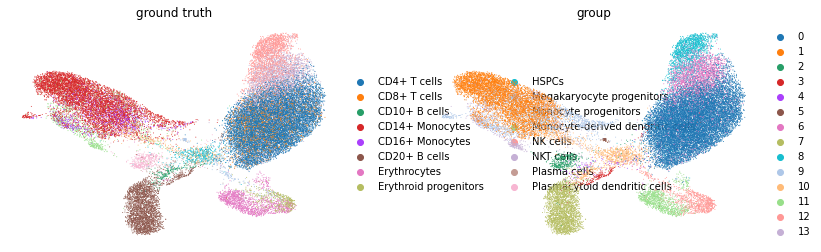

None


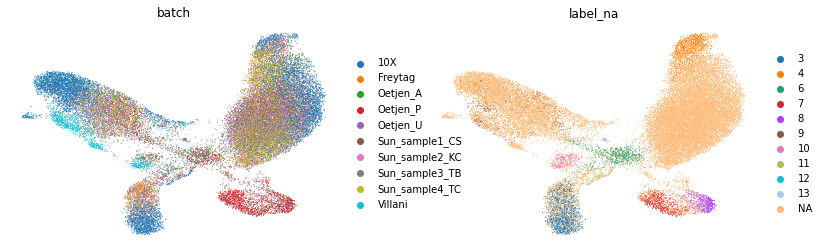

None
Computing NMI ...
Done !
NMI = 0.5891109851557338
Epoch : [1] ,  a_loss = 342.4702, d_loss: -0.3572 , db_loss: 3.2764
Epoch : [2] ,  a_loss = 466.4833, d_loss: -0.0419 , db_loss: 0.7978
Epoch : [3] ,  a_loss = 386.7474, d_loss: -0.4481 , db_loss: 2.3266
Epoch : [4] ,  a_loss = 340.1563, d_loss: -0.0381 , db_loss: 1.6505
Epoch : [5] ,  a_loss = 333.7558, d_loss: -0.0574 , db_loss: 2.5081
Epoch : [6] ,  a_loss = 460.7767, d_loss: -0.3416 , db_loss: 0.8362
Epoch : [7] ,  a_loss = 331.8022, d_loss: -0.1744 , db_loss: 1.6123
Epoch : [8] ,  a_loss = 437.6187, d_loss: -0.2780 , db_loss: 0.9122
Epoch : [9] ,  a_loss = 415.3937, d_loss: -0.2438 , db_loss: 1.5454
Epoch : [10] ,  a_loss = 359.0013, d_loss: -0.1317 , db_loss: 1.8662
Epoch : [11] ,  a_loss = 326.5761, d_loss: -0.1985 , db_loss: 1.8299
Epoch : [12] ,  a_loss = 402.1909, d_loss: -0.2510 , db_loss: 1.4324
Epoch : [13] ,  a_loss = 395.7675, d_loss: -0.0148 , db_loss: 0.9299
Epoch : [14] ,  a_loss = 452.5113, d_loss: -0.0074 , db_l

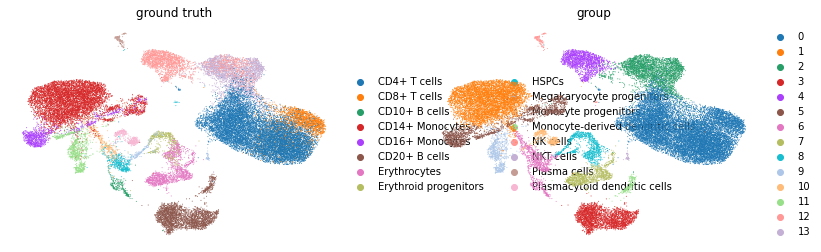

None


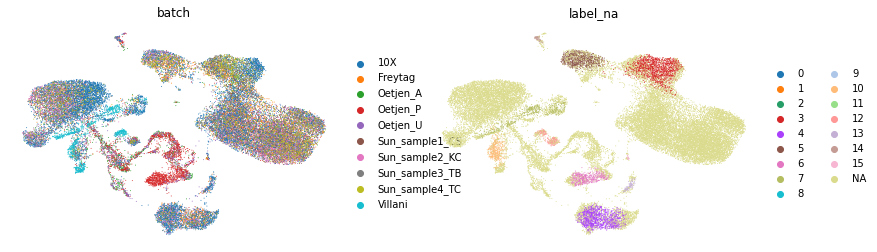

None
Computing NMI ...
Done !
NMI = 0.7266435843745488
Epoch : [51] ,  a_loss = 302.7214, d_loss: -0.0096 , db_loss: 2.1849
Epoch : [52] ,  a_loss = 359.0393, d_loss: -0.0069 , db_loss: 1.4313
Epoch : [53] ,  a_loss = 556.2180, d_loss: -0.0018 , db_loss: 0.6515
Epoch : [54] ,  a_loss = 275.1826, d_loss: -0.0085 , db_loss: 2.5032
Epoch : [55] ,  a_loss = 291.2574, d_loss: -0.0064 , db_loss: 2.4337
Epoch : [56] ,  a_loss = 301.4686, d_loss: -0.0090 , db_loss: 1.7772
Epoch : [57] ,  a_loss = 279.9244, d_loss: -0.0056 , db_loss: 2.3940
Epoch : [58] ,  a_loss = 270.0312, d_loss: -0.0056 , db_loss: 2.3552
Epoch : [59] ,  a_loss = 404.2719, d_loss: -0.0039 , db_loss: 0.7054
Epoch : [60] ,  a_loss = 282.1825, d_loss: -0.0105 , db_loss: 2.1282
Epoch : [61] ,  a_loss = 406.4966, d_loss: -0.0035 , db_loss: 0.8881
Epoch : [62] ,  a_loss = 393.7962, d_loss: -0.0098 , db_loss: 0.8521
Epoch : [63] ,  a_loss = 353.4947, d_loss: -0.0034 , db_loss: 1.6807
Epoch : [64] ,  a_loss = 404.8511, d_loss: -0.00

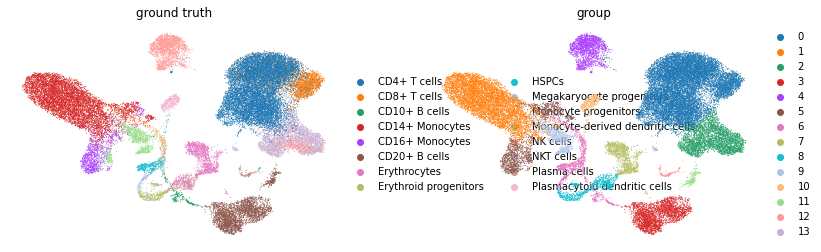

None


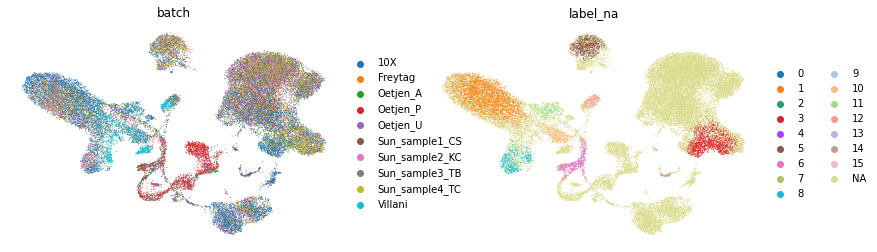

None
Computing NMI ...
Done !
NMI = 0.7378076598081401
Epoch : [101] ,  a_loss = 394.9864, d_loss: -0.0110 , db_loss: 0.9928
Epoch : [102] ,  a_loss = 328.2184, d_loss: -0.0460 , db_loss: 2.4960
Epoch : [103] ,  a_loss = 381.6161, d_loss: -0.0623 , db_loss: 0.9145
Epoch : [104] ,  a_loss = 280.2098, d_loss: -0.0720 , db_loss: 2.5486
Epoch : [105] ,  a_loss = 388.3816, d_loss: -0.0449 , db_loss: 0.9095
Epoch : [106] ,  a_loss = 381.8671, d_loss: -0.0469 , db_loss: 0.9036
Epoch : [107] ,  a_loss = 387.0833, d_loss: -0.0632 , db_loss: 0.9196
Epoch : [108] ,  a_loss = 347.1250, d_loss: -0.0664 , db_loss: 1.5763
Epoch : [109] ,  a_loss = 337.4467, d_loss: -0.0543 , db_loss: 1.6298
Epoch : [110] ,  a_loss = 329.5486, d_loss: -0.0572 , db_loss: 1.5111
Epoch : [111] ,  a_loss = 390.8431, d_loss: -0.0805 , db_loss: 0.7731
Epoch : [112] ,  a_loss = 384.4639, d_loss: -0.0600 , db_loss: 1.1437
Epoch : [113] ,  a_loss = 277.7509, d_loss: -0.0531 , db_loss: 2.1150
Epoch : [114] ,  a_loss = 314.7591,

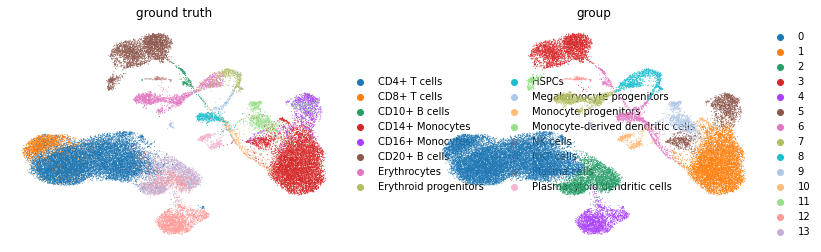

None


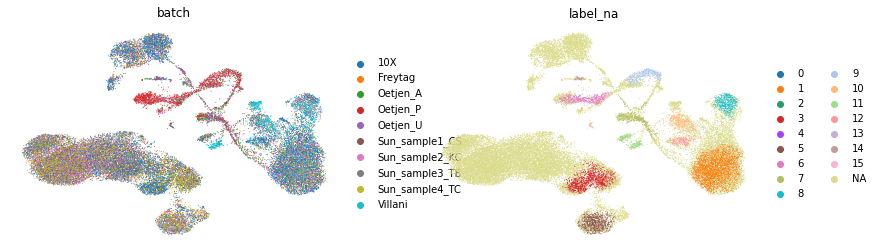

None
Computing NMI ...
Done !
NMI = 0.7194118663935188
Epoch : [151] ,  a_loss = 259.0834, d_loss: -0.4294 , db_loss: 2.6486
Epoch : [152] ,  a_loss = 272.3656, d_loss: -0.3811 , db_loss: 2.4539
Epoch : [153] ,  a_loss = 342.3087, d_loss: -0.3699 , db_loss: 1.7436
Epoch : [154] ,  a_loss = 291.2304, d_loss: -0.2829 , db_loss: 2.9756
Epoch : [155] ,  a_loss = 271.9989, d_loss: -0.4538 , db_loss: 2.3067
Epoch : [156] ,  a_loss = 284.2870, d_loss: -0.3920 , db_loss: 2.4887
Epoch : [157] ,  a_loss = 391.1009, d_loss: -0.3209 , db_loss: 1.0395
Epoch : [158] ,  a_loss = 281.8421, d_loss: -0.2231 , db_loss: 2.4252
Epoch : [159] ,  a_loss = 392.7596, d_loss: -0.3407 , db_loss: 0.9463
Epoch : [160] ,  a_loss = 389.3411, d_loss: -0.3481 , db_loss: 0.8104
Epoch : [161] ,  a_loss = 378.8869, d_loss: -0.2906 , db_loss: 0.9083
Epoch : [162] ,  a_loss = 262.8641, d_loss: -0.4819 , db_loss: 2.4758
Epoch : [163] ,  a_loss = 336.2931, d_loss: -0.5171 , db_loss: 1.5404
Epoch : [164] ,  a_loss = 287.0045,

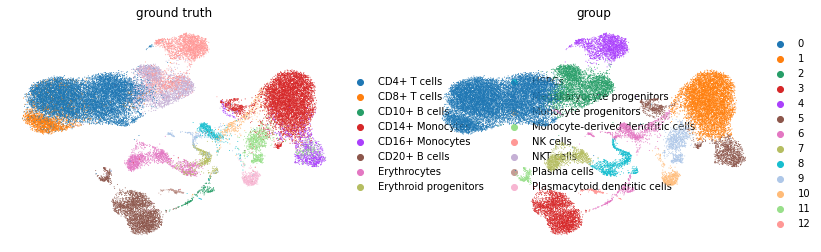

None


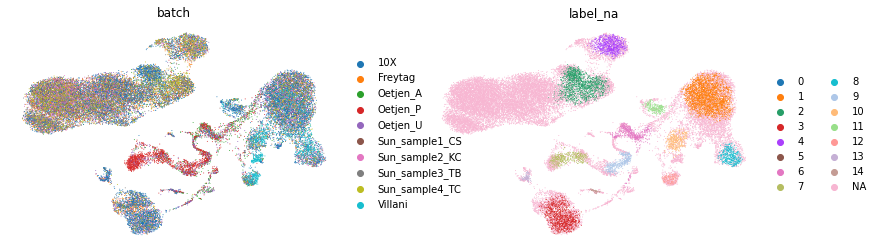

None
Computing NMI ...
Done !
NMI = 0.7041065812863175
Epoch : [201] ,  a_loss = 302.3276, d_loss: -0.4378 , db_loss: 2.1359
Epoch : [202] ,  a_loss = 298.5929, d_loss: -0.4404 , db_loss: 1.8305
Epoch : [203] ,  a_loss = 320.9083, d_loss: -0.5084 , db_loss: 2.2511
Epoch : [204] ,  a_loss = 268.4585, d_loss: -0.6062 , db_loss: 2.6062
Epoch : [205] ,  a_loss = 267.2168, d_loss: -0.4729 , db_loss: 2.5440
Epoch : [206] ,  a_loss = 303.7320, d_loss: -0.4670 , db_loss: 2.1507
Epoch : [207] ,  a_loss = 380.9398, d_loss: -0.6062 , db_loss: 0.9843
Epoch : [208] ,  a_loss = 384.6300, d_loss: -0.5480 , db_loss: 1.0123
Epoch : [209] ,  a_loss = 291.0420, d_loss: -0.3865 , db_loss: 3.0479
Epoch : [210] ,  a_loss = 297.9496, d_loss: -0.5851 , db_loss: 2.3663
Epoch : [211] ,  a_loss = 387.8434, d_loss: -0.5434 , db_loss: 0.8413
Epoch : [212] ,  a_loss = 377.5091, d_loss: -0.6039 , db_loss: 0.9678
Epoch : [213] ,  a_loss = 323.0173, d_loss: -0.6025 , db_loss: 1.9210
Epoch : [214] ,  a_loss = 334.2280,

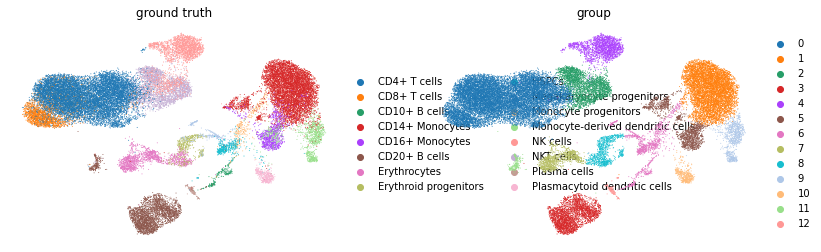

None


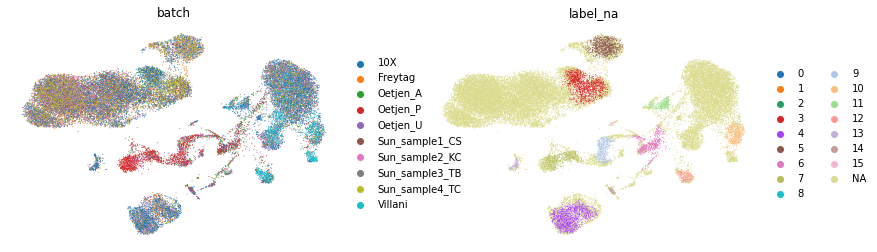

None
Computing NMI ...
Done !
NMI = 0.7351987902947618
Epoch : [251] ,  a_loss = 380.5667, d_loss: -0.3594 , db_loss: 0.9328
Epoch : [252] ,  a_loss = 288.4430, d_loss: -0.5079 , db_loss: 2.4025
Epoch : [253] ,  a_loss = 383.9442, d_loss: -0.4456 , db_loss: 1.0828
Epoch : [254] ,  a_loss = 273.1978, d_loss: -0.2375 , db_loss: 2.7942
Epoch : [255] ,  a_loss = 305.1593, d_loss: -0.3551 , db_loss: 1.8084
Epoch : [256] ,  a_loss = 321.9009, d_loss: -0.3380 , db_loss: 2.5258
Epoch : [257] ,  a_loss = 273.7930, d_loss: -0.5539 , db_loss: 2.1930
Epoch : [258] ,  a_loss = 266.3931, d_loss: -0.4602 , db_loss: 2.0560
Epoch : [259] ,  a_loss = 289.3288, d_loss: -0.4613 , db_loss: 2.3373
Epoch : [260] ,  a_loss = 271.7001, d_loss: -0.4570 , db_loss: 2.1259
Epoch : [261] ,  a_loss = 269.4677, d_loss: -0.6611 , db_loss: 2.1054
Epoch : [262] ,  a_loss = 391.7323, d_loss: -0.4886 , db_loss: 0.6794
Epoch : [263] ,  a_loss = 384.0544, d_loss: -0.4562 , db_loss: 0.6797
Epoch : [264] ,  a_loss = 381.3313,

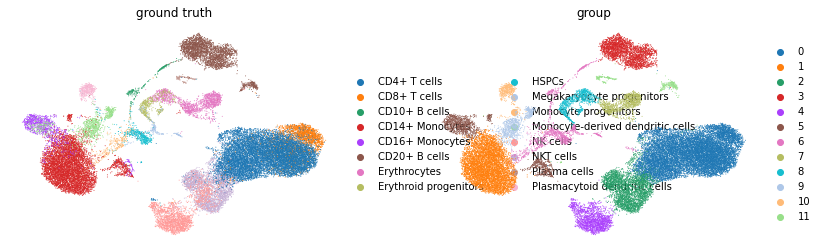

None


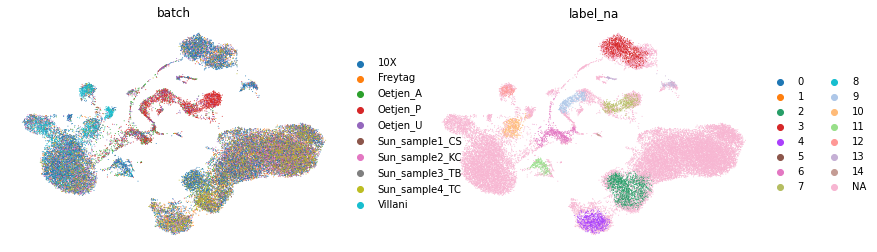

None
Computing NMI ...
Done !
NMI = 0.7135534660339391


In [7]:

import src.model_scanvi_semisupervised as model

run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 300,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        cell_type_NA = cell_type_key_dic_NA[name],
        plot_cell_type = plot_cell_type_key_dic[name],
        name = name,
        dis_conn = 0.0, 
        conn = 0.5,
        community_algo = "leiden" # "louvain", leiden
        )

    dreamer.train_cluster()
    